# vggish tests

<a href="https://colab.research.google.com/github/inspektral/onset-benchmark/blob/main/vggish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import os

if 'google.colab' in str(get_ipython()):
    repo_name = 'onset-benchmark'
    repo_path = f'/content/{repo_name}'
    
    # Check if the current working directory is already the repo
    if os.getcwd() != repo_path:
        if not os.path.exists(repo_path):
            !git clone https://github.com/inspektral/onset-benchmark.git
        os.chdir(repo_path)  # Change to the repository directory
        !pip install -r requirements.txt  # Install dependencies

In [54]:
import numpy as np
import matplotlib.pyplot as plt

import synth
from IPython.display import Audio, display
import librosa

import utils

import torch
from torchvggish.torchvggish import vggish, vggish_input

In [55]:
import test_signals

tests = {}

for name, obj in vars(test_signals).items():
    if callable(obj):
        tests[name] = obj

print("Available tests:")
for i, name in enumerate(tests.keys()):
    print(f"{i}: {name}")



Available tests:
0: random_sines
1: saw_noise


In [56]:
SAMPLE_RATE = 44100
CURRENT_TEST = 1

Running test: saw_noise


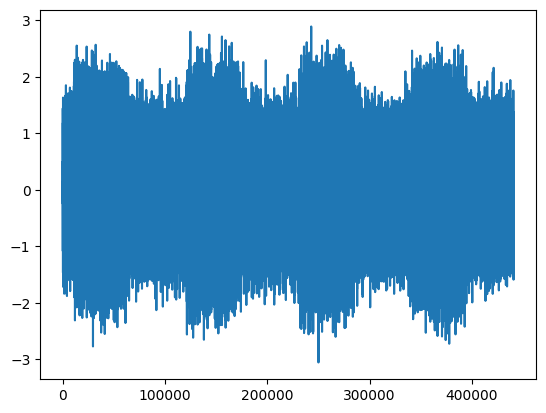

In [ ]:
test = tests[list(tests.keys())[CURRENT_TEST]]
print(f"Running test: {test.__name__}")
audio, modulator = test()

plt.plot(audio, label='audio')
modulator = utils.norm(synth.stretch_array(modulator, len(audio)))
plt.plot(modulator, alpha=0.8, label='modulator')
plt.title(test.__name__)
plt.legend()

plt.show()

display(Audio(audio, rate=SAMPLE_RATE))

2025-05-16 13:00:15.262067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-16 13:00:15.265044: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.402GHz coreCount: 30 deviceMemorySize: 5.70GiB deviceMemoryBandwidth: 268.26GiB/s
2025-05-16 13:00:15.265064: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-05-16 13:00:15.265080: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] D

embeddings:  [[0.         0.03677694 0.34043366 ... 0.         0.4040017  0.        ]
 [0.         0.         0.38394547 ... 0.         0.09972584 0.        ]
 [0.         0.33366114 0.03634128 ... 0.         0.31021482 0.        ]
 ...
 [0.         0.15892941 0.11364815 ... 0.         0.40221477 0.04132241]
 [0.         0.         0.33924937 ... 0.         0.44368958 0.        ]
 [0.         0.05033058 0.29885495 ... 0.         0.12677997 0.        ]]
embeddings shape:  (128, 10)


/gpu_device.cc:1277] 0:   N 
2025-05-16 13:00:15.280492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-05-16 13:00:15.285606: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.402GHz coreCount: 30 deviceMemorySize: 5.70GiB deviceMemoryBandwidth: 268.26GiB/s
2025-05-16 13:00:15.285677: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2025-05-16 13:00:15.285718: I tensorflow/core/common_runt

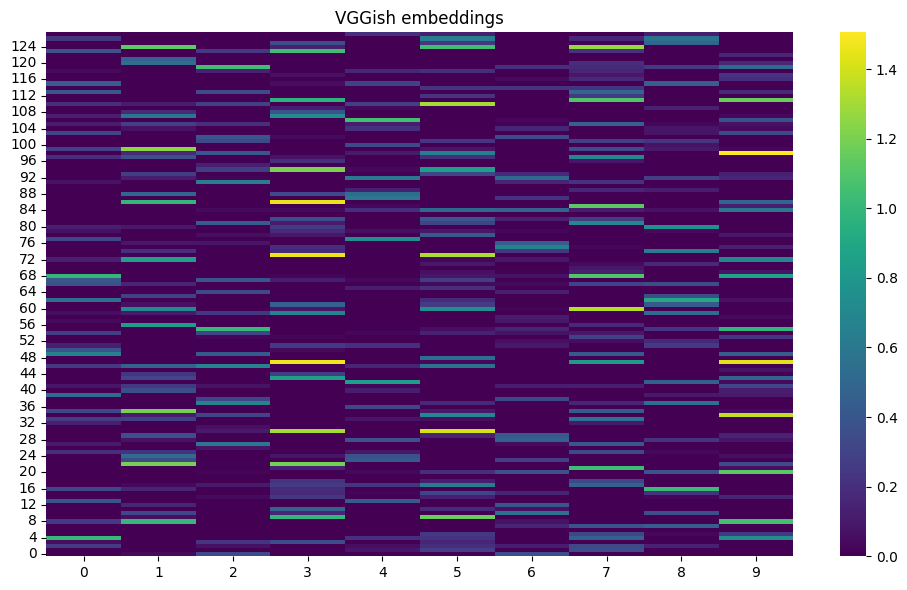

In [58]:
from essentia.standard import MonoLoader, TensorflowPredictVGGish

model = TensorflowPredictVGGish(graphFilename="weights/audioset-vggish-3.pb", output="model/vggish/embeddings")
embeddings = model(audio)

print("embeddings: ", embeddings)
embeddings = np.array(embeddings)
embeddings = np.reshape(embeddings, (embeddings.shape[1], embeddings.shape[0]))

print("embeddings shape: ", embeddings.shape)

utils.plot_heatmap(embeddings, title="VGGish embeddings")

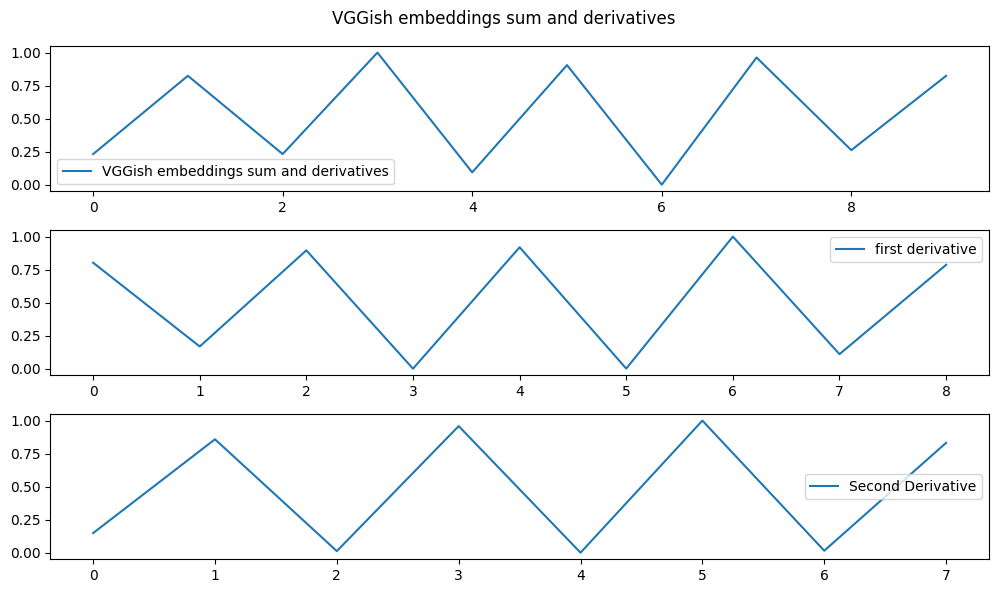

In [60]:


embeddings_sum = np.sum(embeddings, axis=0)
d_embeddings_sum = np.diff(embeddings_sum)
dd_embeddings_sum = np.diff(d_embeddings_sum)

utils.plot_with_derivatives(
    embeddings_sum,
    d_embeddings_sum,
    dd_embeddings_sum,
    modulator,
    title="VGGish embeddings sum and derivatives",
)



distances shape: (128, 9)


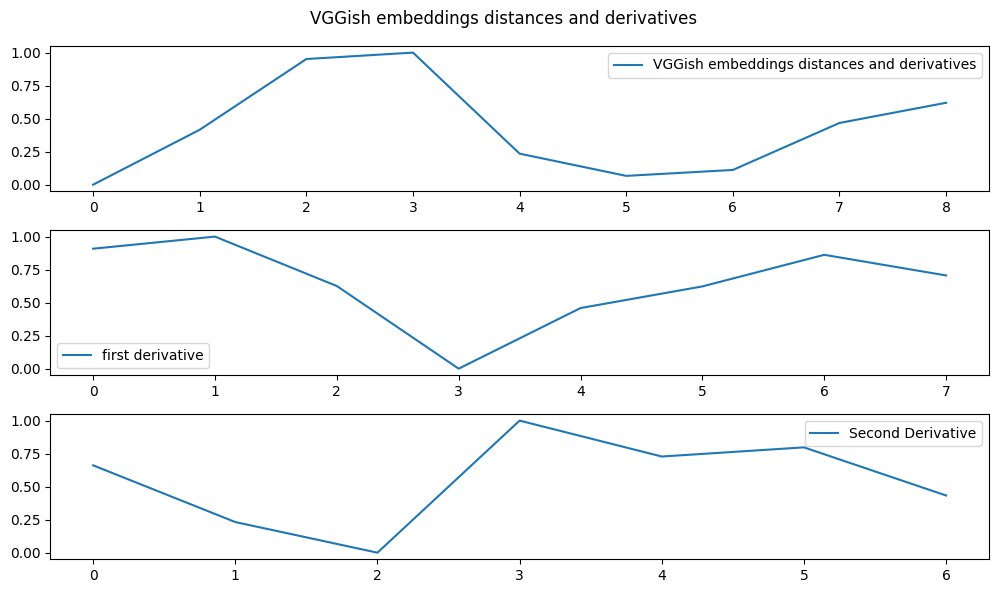

In [61]:
embeddings_distances = utils.distances(embeddings)
d_embeddings_distances = np.diff(embeddings_distances)
dd_embeddings_distances = np.diff(d_embeddings_distances)

utils.plot_with_derivatives(
    embeddings_distances,
    d_embeddings_distances,
    dd_embeddings_distances,
    modulator,
    title="VGGish embeddings distances and derivatives",
)

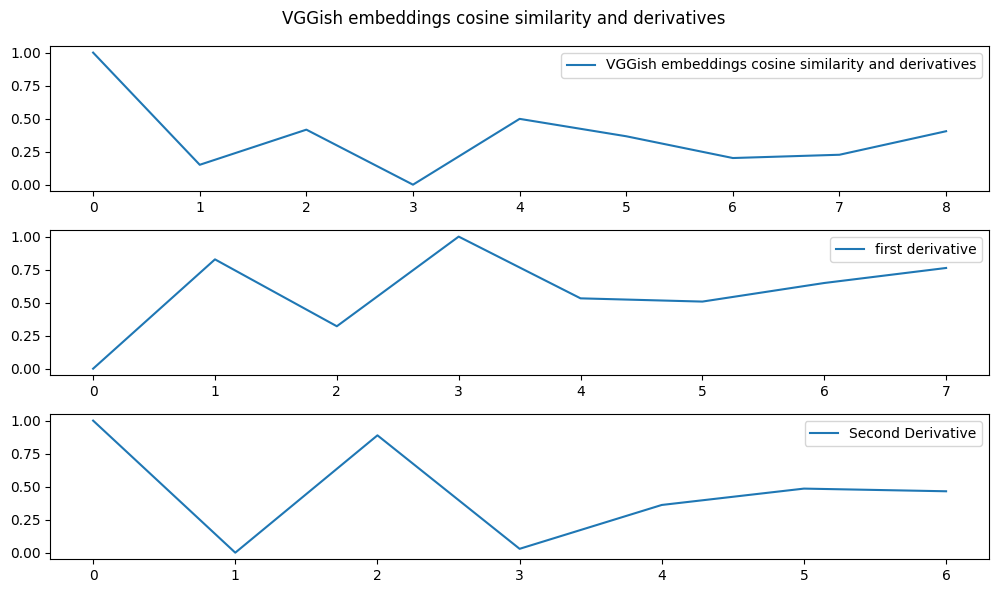

In [62]:
embeddings_cosine = utils.cosine_similarity(embeddings)
d_embeddings_cosine = np.diff(embeddings_cosine)
dd_embeddings_cosine = np.diff(d_embeddings_cosine)

utils.plot_with_derivatives(
    embeddings_cosine,
    d_embeddings_cosine,
    dd_embeddings_cosine,
    modulator,
    title="VGGish embeddings cosine similarity and derivatives",
)